# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd
import numpy as np

boston = pd.read_csv("../data/boston_data.csv")

In [2]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [ ]:
bo

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

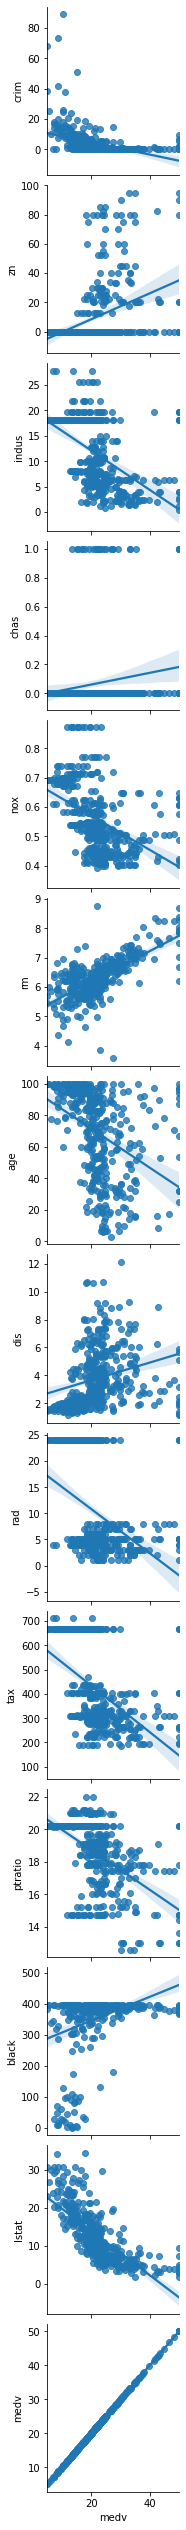

In [3]:
# Your plots here
import seaborn as sns

sns.pairplot(data=boston, y_vars=boston.columns, x_vars='medv', kind='reg')



### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

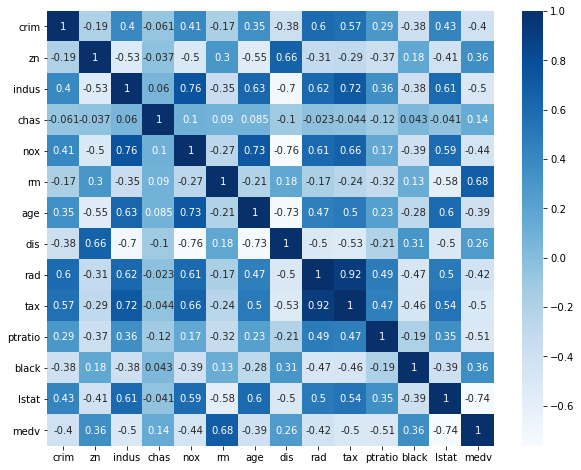

In [15]:
# Your response here
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(boston.corr(), annot=True, cmap='Blues')

In [16]:
boston.drop(['tax'], axis=1, inplace=True)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [19]:
# Your code here

boston['medv'].describe()


count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [20]:
from sklearn.metrics import r2_score

def performance_metric(x, y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    y_pred = regressor.predict(x)
    score = r2_score(y_pred)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [26]:
# Your code here
from sklearn.model_selection import train_test_split

X = boston.drop(columns = 'medv')
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=8)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [27]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

depth = [2, 4, 6, 8, 10]

train_r2 = []
test_r2 = []

for z in depth:
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, max_depth=z)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    r2_train = r2_score(y_train_pred, y_train)
    train_r2.append(r2_train)
    r2_test = r2_score(y_test_pred, y_test)
    test_r2.append(r2_test)
    
    print('depth=', z, 'train r2=', r2_train)
    print('depth=', z, 'test r2=', r2_test)

depth= 2 train r2= 0.6391329783333366
depth= 2 test r2= 0.573927925040211
depth= 4 train r2= 0.8899172254028203
depth= 4 test r2= 0.7498065522915165
depth= 6 train r2= 0.9436685341414969
depth= 6 test r2= 0.7992085961169215
depth= 8 train r2= 0.9642603805678478
depth= 8 test r2= 0.8138505350136236
depth= 10 train r2= 0.9701990022417171
depth= 10 test r2= 0.8195502152556325


Now, plot the score for each tree on the training set and on the testing set.

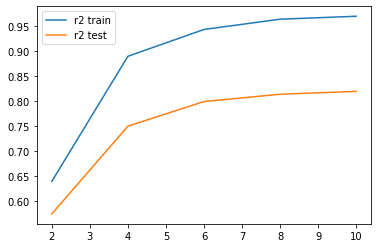

In [29]:
# Produce a plot with the score for the testing and training for the different max depths

plt.plot(depth, train_r2, label='r2 train')
plt.plot(depth, test_r2, label='r2 test')
plt.legend()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [31]:
# Your response here
"""
More depth trees you have, more accurate will be the performance.
Also, train score is much higher than the test.
"""

'\nMore depth trees you have, more accurate will be the performance.\nAlso, train score is much higher than the test.\n'

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [32]:
# Your response here

# It is a high bias with depth 1, and high variance with depth 10.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [33]:
# Your response here

# 4 depth is like the maximum efficient parameter. From then, it decreases a lot the performance.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [34]:
# Your response here
"""
The data collected in 1978 is not relevant for now. Also the model cannot make predictions because of the old data.
I think that we should make some changes to be applicable in a rural city. Changing the features to get a consistent results.

"""

'\nThe data collected in 1978 is not relevant for now. Also the model cannot make predictions because of the old data.\nI think that we should make some changes to be applicable in a rural city. Changing the features to get a consistent results.\n\n'